# Regression with Neural Networks in TensorFlow


In [ ]:
import tensorflow as tf

print(tf.__version__)

2.7.0


## Creating data

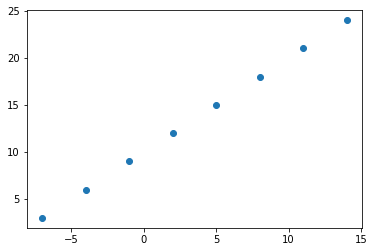

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# features, independent variable
X = np.array([-7.0, -4.0, -1., 2., 5., 8., 11., 14.])

# labels, dependent variable
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([937900])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937900], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X1 = tf.expand_dims(X, axis=-1)
y1 = tf.expand_dims(y, axis=-1)

In [ ]:
input_shape = X1[0].shape
output_shape = y1[0].shape

input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

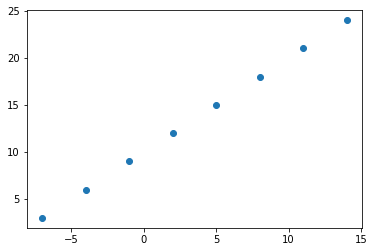

In [ ]:
plt.scatter(X1, y1)

## Steps in modelling with tensorflow

1. Creating model - define the input, hidden layers and output layers of the model.
2. Compiling model - define the loss function and the optimizer.
3. Fitting a model - train the model.


In [ ]:
X1, y1

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>, <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

In [ ]:
tf.random.set_seed(42)

# create
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# compile
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=['mae'])

# fit
model.fit(X1, y1, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 830ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
model.predict([17])

array([[12.716021]], dtype=float32)

In [ ]:
model.predict(X1), y1

(array([[-5.16542  ],
        [-2.9302402],
        [-0.69506  ],
        [ 1.54012  ],
        [ 3.7753   ],
        [ 6.0104804],
        [ 8.245661 ],
        [10.480841 ]], dtype=float32),
 <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

## Improving model

In [ ]:
X1, y1

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>, <tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]])>)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             #tf.keras.layers.Dense(100, activation='relu'),
                             #tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1, activation='relu')
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model.fit(X1, y1, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 946ms/step - loss: 13.2305 - mae: 13.2305
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0769 - mae: 13.0769
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9218 - mae: 12.9218
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8437 - mae: 12.8437
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8559 - mae: 12.8559
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8642 - mae: 12.8642
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 12.8689 - mae: 12.8689
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 12.8709 - mae: 12.8709
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 12.8709 - mae: 12.8709
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 12.8691 - mae: 12.8691
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17])

array([[26.818407]], dtype=float32)

## Evaluating a model

In [ ]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [ ]:
 X = tf.range(-100, 100, 4)
 X 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

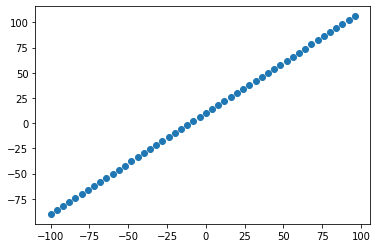

In [ ]:
plt.scatter(X, y);

### 3 sets (training, test, validation)

In [ ]:
len(X)

50

In [ ]:
# 80%-20%

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]



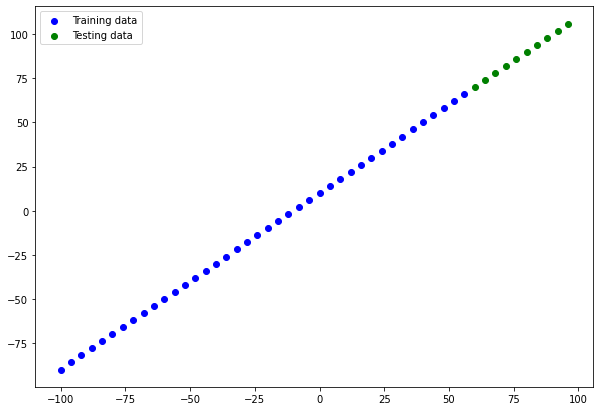

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')

plt.legend()
plt.show()

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu', input_shape=[1], name='input_layer'),
                             tf.keras.layers.Dense(1, name='output_layer')
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Visualization of the model

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 2s 13ms/step - loss: 39.6591 - mae: 39.6591
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 30.2460 - mae: 30.2460
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 21.5070 - mae: 21.5070
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 12.9056 - mae: 12.9056
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 7.2821 - mae: 7.2821
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 9.2343 - mae: 9.2343
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 10.0395 - mae: 10.0395
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 8.8133 - mae: 8.8133
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 7.4350 - mae: 7.4350
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 8.4458 - mae: 8.4458
Epoch 11/100
2/2 [==============================] - 0s 19ms

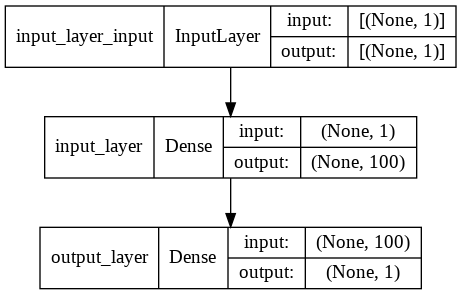

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model prediction's

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.83111],
       [ 74.84259],
       [ 78.87371],
       [ 82.90482],
       [ 86.93595],
       [ 90.96708],
       [ 94.99821],
       [ 99.02933],
       [103.06045],
       [107.09157]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  plt.scatter(test_data, test_labels, c='g', label='Test data')
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  plt.legend();

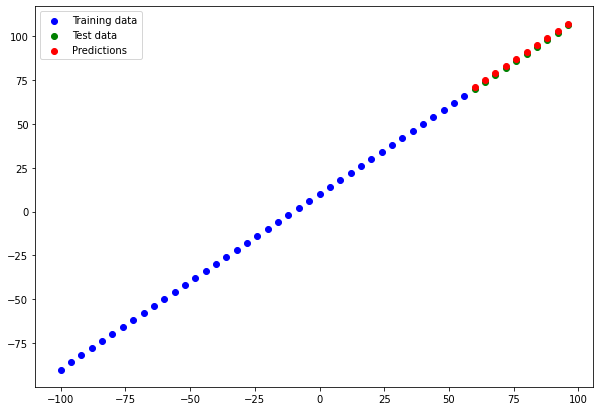

In [ ]:
plot_predictions()

### Evaluating metrics

* MAE
* MSE


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 519ms/step - loss: 0.9535 - mae: 0.9535


[0.9534835815429688, 0.9534835815429688]

In [ ]:
# mean absolute error

tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9534813>

In [ ]:
y_pred, y_test

(array([[ 70.83111],
        [ 74.84259],
        [ 78.87371],
        [ 82.90482],
        [ 86.93595],
        [ 90.96708],
        [ 94.99821],
        [ 99.02933],
        [103.06045],
        [107.09157]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# mean squared error

tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.9166023>

In [ ]:
# Huber

h = tf.keras.losses.Huber()
h(y_test, tf.squeeze(y_pred)).numpy()

0.45765623

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

## Experiments to improve our model

**Model 1**

In [ ]:
#### model 1

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 26.4821 - mae: 26.4821
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 8.5605 - mae: 8.5605
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.7800 - mae: 10.7800
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2395 - mae: 11.2395
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 12.4704 - mae: 12.4704
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6435 - mae: 9.6435
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 8.7477 - mae: 8.7477
Epoch 8/100
2/2 [==============================] - 0s 17ms/step - loss: 9.0532 - mae: 9.0532
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 19.2073 - mae: 19.2073
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.3632 - mae: 10.3632
Epoch 11/100
2/2 [==============================] - 0s 16ms

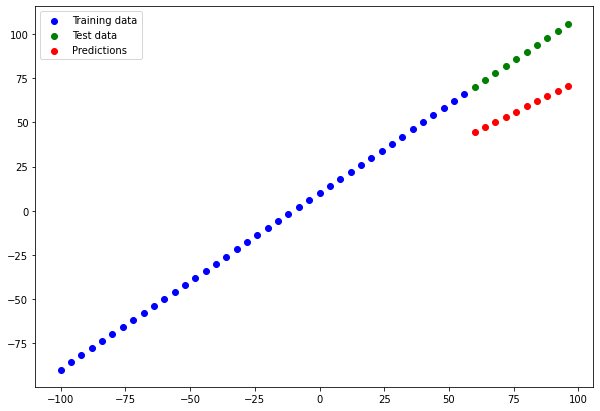

In [ ]:
# predictions model 1

y_preds_1 = model_1.predict(X_test)

plot_predictions(predictions=y_preds_1)

In [ ]:
# model 1 evaluation metrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.40302>,
 <tf.Tensor: shape=(), dtype=float32, numpy=934.5885>)

**Model 2**

In [ ]:
#### model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [================

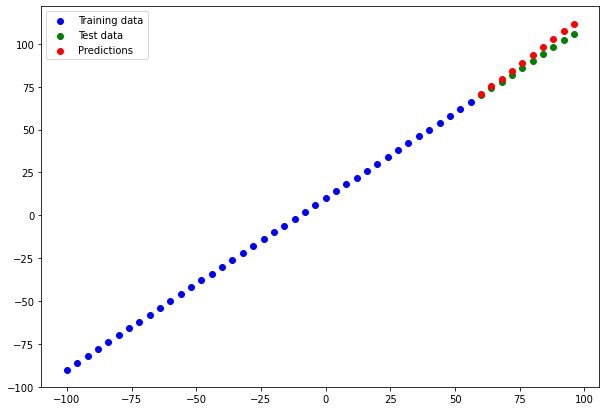

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Model 3**

In [ ]:
#### model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 14ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 15ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 13ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 11ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 13ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [=================

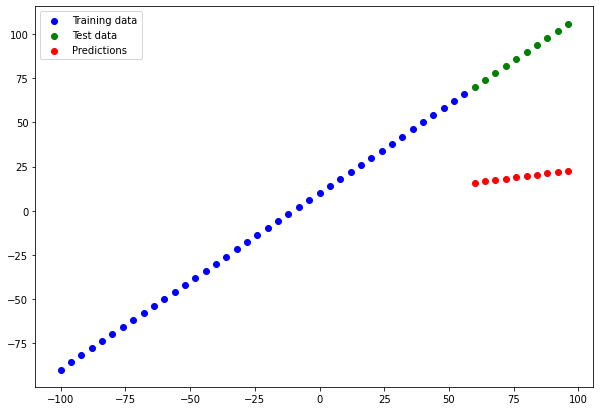

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results

In [ ]:
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,30.403021,934.588501
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking you experiments

* TensorBoard
* Weight and biases

## Save a model

In [ ]:
# using SavedModel format

model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# using hdf5 format

model_2.save('best_model_HDF5_format.h5')

## Load a saved model

In [ ]:
# load in the SavedModel format

loaded_SavedModel = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_preds = loaded_SavedModel.predict(X_test)

model_2_preds == loaded_SavedModel_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download google colab files

In [ ]:
from google.colab import files

files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**One-Hot Encoding**

In [ ]:
insurance_oh = pd.get_dummies(insurance)
insurance_oh

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


**Split features and labels**

In [ ]:
y = insurance_oh['charges'].values
#y = tf.expand_dims(tf.constant(y), axis=-1)
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
X = insurance_oh.drop(columns='charges').values
#X = tf.constant(X)
X

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

**Split data into test and training sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test.shape, X_train.shape

((268, 11), (1070, 11))

**Build a neural network**

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(1, activation='relu')
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])


history = model.fit(X_train, y_train, epochs=400)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/400
34/34 [==============================] - 1s 4ms/step - loss: 12835.1230 - mae: 12835.1230
Epoch 2/400
34/34 [==============================] - 0s 4ms/step - loss: 9499.6963 - mae: 9499.6963
Epoch 3/400
34/34 [==============================] - 0s 4ms/step - loss: 7386.9878 - mae: 7386.9878
Epoch 4/400
34/34 [==============================] - 0s 4ms/step - loss: 7221.9692 - mae: 7221.9692
Epoch 5/400
34/34 [==============================] - 0s 4ms/step - loss: 7128.4453 - mae: 7128.4453
Epoch 6/400
34/34 [==============================] - 0s 4ms/step - loss: 6978.2437 - mae: 6978.2437
Epoch 7/400
34/34 [==============================] - 0s 4ms/step - loss: 6833.6167 - mae: 6833.6167
Epoch 8/400
34/34 [==============================] - 0s 4ms/step - loss: 6680.1938 - mae: 6680.1938
Epoch 9/400
34/34 [==============================] - 0s 4ms/step - loss: 6508.2036 - mae: 6508.2036
Epoch 10/400
34/34 [==============================] - 0s 4ms/step - loss: 6378.6411 - mae: 6378.64

**Evaluating**

In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2444.1541 - mae: 2444.1541


[2444.154052734375, 2444.154052734375]

In [ ]:
y_preds = model.predict(X_test)

Text(0.5, 0, 'epochs')

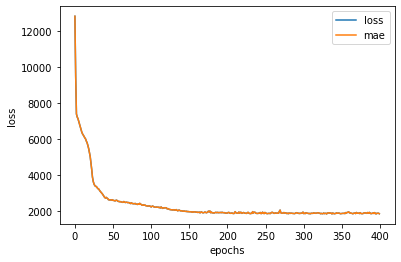

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing data (normalization and standarlization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

## Testing model with normalized data

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(1, activation='relu')
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.005),
              metrics=['mae'])


history = model.fit(X_train_normal, y_train, epochs=400)

Epoch 1/400
34/34 [==============================] - 1s 4ms/step - loss: 13340.1504 - mae: 13340.1504
Epoch 2/400
34/34 [==============================] - 0s 5ms/step - loss: 13248.4404 - mae: 13248.4404
Epoch 3/400
34/34 [==============================] - 0s 5ms/step - loss: 12842.4268 - mae: 12842.4268
Epoch 4/400
34/34 [==============================] - 0s 6ms/step - loss: 11801.5234 - mae: 11801.5234
Epoch 5/400
34/34 [==============================] - 0s 4ms/step - loss: 10153.0586 - mae: 10153.0586
Epoch 6/400
34/34 [==============================] - 0s 4ms/step - loss: 8675.9551 - mae: 8675.9551
Epoch 7/400
34/34 [==============================] - 0s 4ms/step - loss: 7983.4692 - mae: 7983.4692
Epoch 8/400
34/34 [==============================] - 0s 4ms/step - loss: 7780.5225 - mae: 7780.5225
Epoch 9/400
34/34 [==============================] - 0s 4ms/step - loss: 7633.6382 - mae: 7633.6382
Epoch 10/400
34/34 [==============================] - 0s 4ms/step - loss: 7483.2690 - mae:

In [ ]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1844.5416 - mae: 1844.5416


[1844.5416259765625, 1844.5416259765625]

In [ ]:
y_preds = model.predict(X_test_normal)
y_preds

array([[ 9103.629 ],
       [ 5258.356 ],
       [31352.686 ],
       [ 9258.969 ],
       [25582.783 ],
       [ 4530.7505],
       [ 2091.4282],
       [14221.825 ],
       [ 3727.2798],
       [10227.252 ],
       [21420.566 ],
       [ 7217.8403],
       [ 3906.4404],
       [50005.93  ],
       [52763.023 ],
       [45414.58  ],
       [ 9758.6045],
       [42375.34  ],
       [ 8200.029 ],
       [24675.963 ],
       [ 5076.0254],
       [ 7420.9814],
       [ 1233.8671],
       [ 2758.0403],
       [11049.744 ],
       [10924.905 ],
       [12629.389 ],
       [ 5106.604 ],
       [ 9734.51  ],
       [ 1103.8052],
       [ 8253.196 ],
       [11808.203 ],
       [ 2021.3739],
       [ 5669.717 ],
       [ 2878.3223],
       [ 7422.599 ],
       [ 2588.6025],
       [ 7325.7036],
       [24182.178 ],
       [36615.047 ],
       [ 4661.39  ],
       [ 2625.3208],
       [11635.326 ],
       [12065.443 ],
       [ 4857.1074],
       [12301.859 ],
       [ 3563.033 ],
       [ 4382

In [ ]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [ ]:
mse = tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_preds))
mae = tf.keras.losses.mean_absolute_error(y_test, tf.squeeze(y_preds))

mse, mae

(<tf.Tensor: shape=(), dtype=float32, numpy=21470408.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1844.5416>)

Text(0.5, 0, 'epochs')

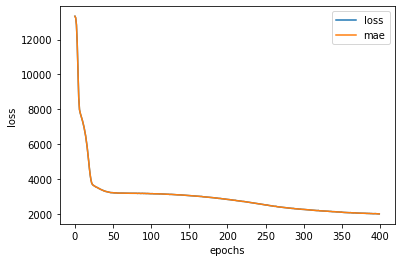

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Correlation

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
pd.get_dummies(insurance).corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


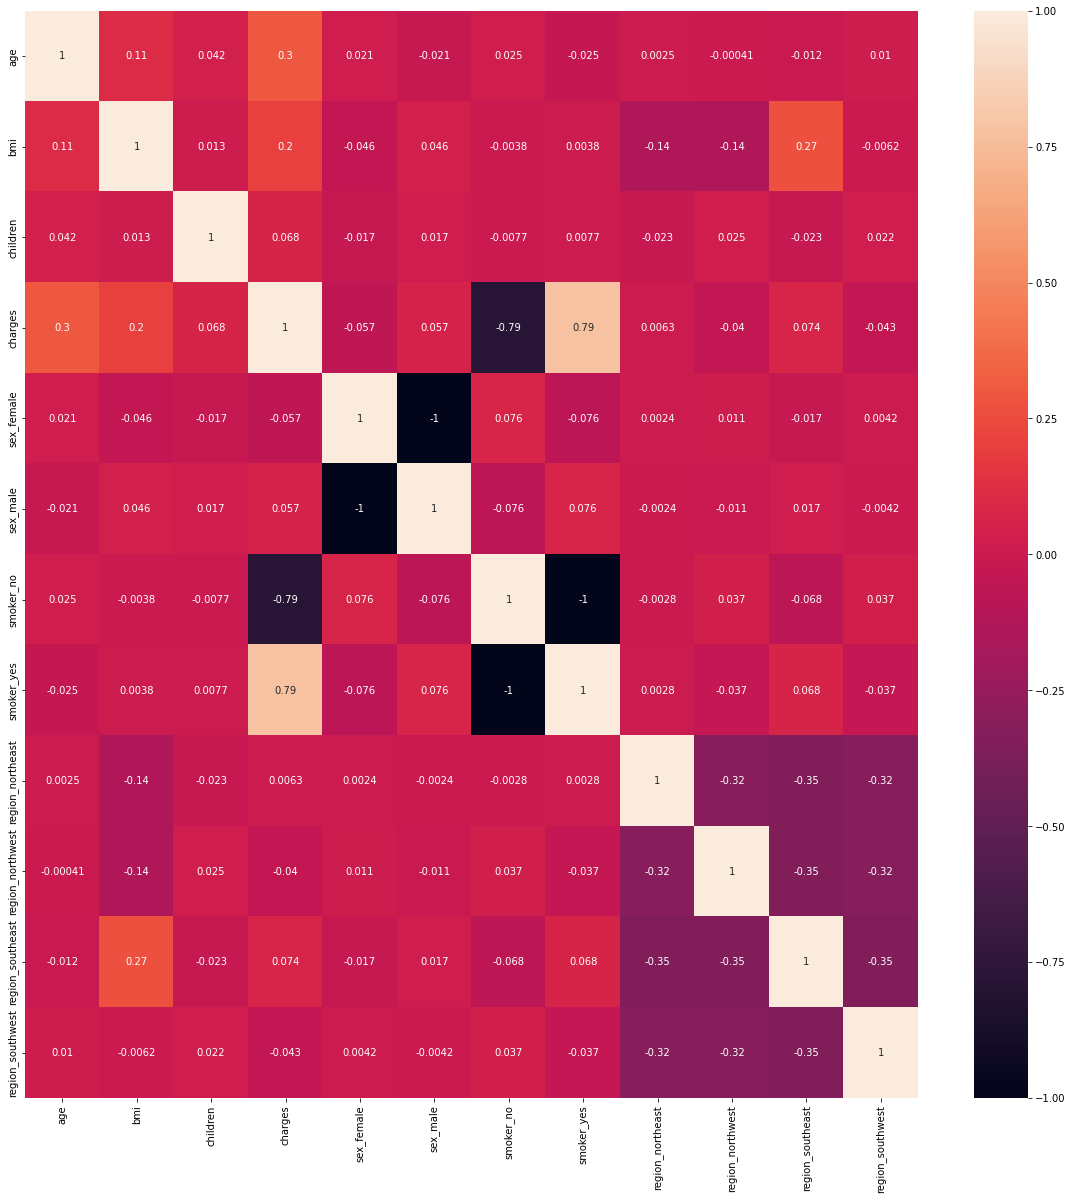

In [ ]:
import seaborn as sns

figura = plt.figure(figsize=(20,20))
sns.heatmap(pd.get_dummies(insurance).corr(), annot=True);

In [ ]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

regressor_insurance = LinearRegression()
regressor_insurance.fit(X_train_normal, y_train)

LinearRegression()

In [ ]:
regressor_insurance.intercept_, regressor_insurance.coef_

(-1.1250135274570651e+18,
 array([1.18791138e+04, 1.24959529e+04, 1.81491987e+03, 3.96249288e+16,
        3.96249288e+16, 7.76782191e+16, 7.76782191e+16, 1.00771038e+18,
        1.00771038e+18, 1.00771038e+18, 1.00771038e+18]))

In [ ]:
regressor_insurance.score(X_train_normal, y_train)

0.7411651080419495

In [ ]:
regressor_insurance.score(X_test_normal, y_test)

0.782948399877079

In [ ]:
previsoes = regressor_insurance.predict(X_test_normal)
previsoes

array([ 9344.,  7040., 36864.,  9344., 26880., 10496.,   128., 16896.,
        1664., 11008., 27520.,  9216.,  5376., 38272., 40320., 37120.,
       15232., 35968.,  9216., 31488.,  3200.,  9728.,  2048.,  7680.,
       11136., 13568., 14208.,  6016., 10368.,  2304.,  8576., 13056.,
        4736.,  3200.,  4096., 13568.,  1536.,  8448., 33152., 32640.,
        3328.,  4224., 13824., 11520.,  8832., 11776.,  5120.,  2688.,
       35456.,  9216., 16000.,  2432., 12288.,  2048., 13568., 12928.,
        4864., 31872., 13056., 13440., 13952., 10496., 15872.,  7680.,
       12416.,  3968., 25984., 10880.,  2048.,  5888., 11136., 12032.,
       11136.,  9216., 12032.,  6912.,  7680., 10752.,  6656.,  8320.,
        3968., 37120.,  5888., 31104., 34816., 35840.,  7040., 12928.,
        9856., 13952., 18048., 35456., 33536.,  6656., 32128.,  9088.,
       29568.,  3840., 28032.,  6272.,  5376.,  1536., 11648., 14592.,
       12288.,  4352.,  9984., 31872.,   512., 32896.,  2944., 10240.,
      

In [ ]:
mse = tf.keras.losses.mean_squared_error(y_test, previsoes)
mae = tf.keras.losses.mean_absolute_error(y_test, previsoes)

mse, mae

(<tf.Tensor: shape=(), dtype=float64, numpy=33696985.58734316>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4192.463749063432>)